In [1]:
import pandas as pd
import seaborn as sns
import statistics as sts
import numpy as np

# titanic

In [18]:
tita = pd.read_csv('/Users/brayan/Documents/projetos/pandas/dados/titanic.csv')
tita.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
tita.columns = ['id', 'sobrevivente', 'classe', 'nome', 'sexo', 'idade', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'cabine', 'Embarked']
tita.columns

Index(['id', 'sobrevivente', 'classe', 'nome', 'sexo', 'idade', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'cabine', 'Embarked'],
      dtype='object')

In [3]:
tita.dtypes

id                int64
sobrevivente      int64
classe            int64
nome             object
sexo             object
idade           float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
cabine           object
Embarked         object
dtype: object

## valores nulos

In [23]:
tita.isnull().sum()

id                0
sobrevivente      0
classe            0
nome              0
sexo              0
idade           177
SibSp             0
Parch             0
Ticket            0
Fare              0
cabine          687
Embarked          2
dtype: int64

### idade

In [4]:
tita['idade'].isnull().sum()

177

In [5]:
tita['idade'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: idade, dtype: float64

In [6]:
#substituir valor nulo pela mediana
tita['idade'].fillna(28, inplace=True)

In [7]:
tita['idade'].isnull().sum()

0

### embarcado

In [8]:
#descobrindo moda
tita.groupby(['Embarked']).size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [9]:
tita['Embarked'].fillna('S', inplace=True)

### cabine

In [10]:
tita['cabine'].fillna('B98', inplace=True)

In [11]:
tita['cabine'].isnull().sum()

0

# padronizando valores e dados

In [30]:
pessoas = {'nome':['brayan', 'miguel', 'raimundo', 'alguem'],
'idade':[30, 5, 56, np.NaN],
'genero': ['Masculino', 'm', 'masc', 'masc'],
'ultimo_nome':['mesquita', 'nogueira', 'mesquita', np.NaN]}
df = pd.DataFrame(pessoas)
df

,nome,idade,genero,ultimo_nome
0,brayan,30.0,Masculino,mesquita
1,miguel,5.0,m,nogueira
2,raimundo,56.0,masc,mesquita
3,alguem,NaN,masc,NaN


In [25]:
#forma 1
df.loc[df['genero'] == 'Masculino', 'genero'] = 'masculino'

In [26]:
#forma 2 padronizando dados
df.loc[df['genero'].isin(['m', 'masc']), 'genero'] = 'masculino'

In [27]:
#preencher dados faltantes
df.isnull().sum()

nome           0
idade          1
genero         0
ultimo_nome    1
dtype: int64

### idade com mediana

In [28]:
#idade
mediana_idade = sts.median(df.idade)
df['idade'].fillna(mediana_idade, inplace=True)
df['idade']

0    -10.0
1      5.0
2    150.0
3     77.5
Name: idade, dtype: float64

### ultimo nome com moda

In [29]:
moda_nome = df['ultimo_nome'].iloc[2]
df['ultimo_nome'].fillna(moda_nome, inplace=True)

### corrigir range de idade fora do padrão

In [74]:
idades = []
for x in range(-40, 140, 5):
  idades.append(x)
series_idade = pd.Series(idades)
series_idade.describe()

count     36.000000
mean      47.500000
std       52.678269
min      -40.000000
25%        3.750000
50%       47.500000
75%       91.250000
max      135.000000
dtype: float64

In [75]:
series_idade.shape

(36,)

In [80]:
#verificar registros fora do dominio de 0 a 120
series_idade.loc[(series_idade < 0) | (series_idade > 120)].count()

11

In [87]:
mediana_idades = sts.median(series_idade)
series_idade.loc[(series_idade < 0) | (series_idade > 120)] = mediana_idades

In [85]:
series_idade.describe()

count     36.000000
mean      56.180556
std       31.026982
min        0.000000
25%       43.750000
50%       47.500000
75%       76.250000
max      120.000000
dtype: float64

<AxesSubplot: ylabel='Count'>

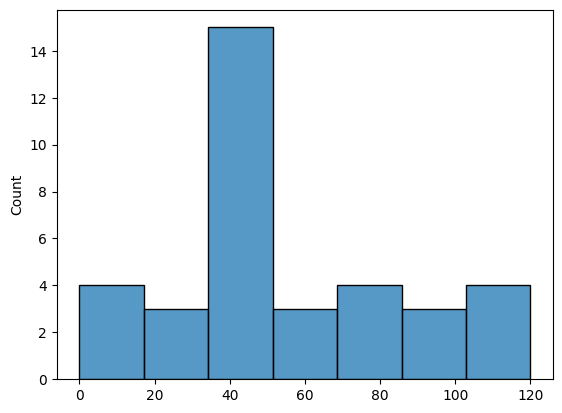

In [88]:
sns.histplot(series_idade)

### removendo dados duplicados

In [104]:
df2 = {'nome': ['brayan', 'miguel', 'brayan', 'brayan'], 
        'id':[1, 2, 1, 1]}
df2 = pd.DataFrame(df2)
 #verificando numeros duplicados em id
df2[df2.duplicated(['id'], keep=False)]



,nome,id
0,brayan,1
2,brayan,1
3,brayan,1


In [105]:
df2.drop_duplicates(subset='id', keep='first', inplace=True)
df2

,nome,id
0,brayan,1
1,miguel,2
